# Finding the Best Markets to Advertise In


![best markets](image_finding.jpeg)


We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

**Our goal in this project is to find out the two best markets to advertise our product in**.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2018-new-coder-survey).



In [1]:
# load libraries
import pandas as pd
import numpy as np
import chardet
import re

In [2]:
%%time
# checking dataset with the Universal Character Encoding Detector
#with open("2018-new-coder-survey.csv", "rb") as file:
#    print(chardet.detect(file.read()))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


## Data Exploration

### Understanding the Data:

- Why I'm using a ready-made data set instead of organizing a survey?.

    - I wanted to get a large sample size quickly and efficiently, so I decided to use pre-existing data instead of conducting my own survey." althought it may not be the best option for every situation.


- What's this data set about.

    - An anonymous survey of thousands of people who started coding less than 5 years ago.
    
- Where can this data set be downloaded.
    - [Download 2017-fCC-New-Coders-Survey-Data.csv](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv)

In [3]:
coder_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv",low_memory=False, encoding = 'utf-8' )

In [4]:
coder_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [5]:
datatype = coder_survey.dtypes
datatype_counter = datatype.value_counts()
datatype_counter

float64    105
object      31
dtype: int64

 ### Optimizing memory
 
 Let's see if we can reduce the memory space of the dataset we are working with.

In [6]:
for column in coder_survey.columns:
    if coder_survey[column].dtype == 'float64': 
        coder_survey[column] = coder_survey[column].astype('float32')
    if coder_survey[column].dtype == 'int64':
        coder_survey[column] = coder_survey[column].astype('int32')

In [7]:
coder_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float32(105), object(31)
memory usage: 11.6+ MB


 ❗ The reduction of memory has been almost 39%

In [8]:
coder_survey.shape

(18175, 136)

In [9]:
pd.set_option("display.max_columns", None)

In [10]:
coder_survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The columns that interest us for our study are:

```
'Age'
'CityPopulation',
'CountryCitizen',
'MonthsProgramming',
'JobRoleInterest'
```

Let's look inside them to know a little more about our data.

In [11]:
coder_survey['Age'].unique()

array([27., 34., 21., 26., 20., 28., 29., 23., 24., 22., 18., 44., 32.,
       46., 31., 30., 19., 54., 37., 36., 16., 17., 25., nan, 45., 48.,
       33., 43., 35., 42., 53., 15., 41., 60., 39., 38., 56., 52., 13.,
       14., 69., 40., 50., 47., 57., 59., 12., 58., 70., 68., 51., 11.,
       49., 73., 55., 71., 67., 72.,  1., 10., 61., 62., 63.,  0., 76.,
        8., 90., 66.,  2.,  5., 65.,  3., 64., 75.], dtype=float32)

In [12]:
coder_survey['CityPopulation'].value_counts()

more than 1 million              6534
between 100,000 and 1 million    5276
less than 100,000                3544
Name: CityPopulation, dtype: int64

In [13]:
coder_survey['CountryCitizen'].value_counts().head(10)

United States of America    5480
India                       1594
United Kingdom               640
Canada                       564
Brazil                       399
Poland                       297
Russia                       294
Germany                      251
Ukraine                      246
France                       245
Name: CountryCitizen, dtype: int64

In [14]:
coder_survey['MonthsProgramming'].unique()

array([  6.,   5.,  24.,  12.,   4.,  29.,  18.,   1.,   3.,  nan,   9.,
        40.,  14.,  28.,  20.,   2.,   0.,  25.,   8.,  32.,  15.,  16.,
        48.,  10.,  26.,  60., 200.,  36.,  30.,  52.,  58.,  19.,  45.,
        50.,  54., 100.,  80., 120.,  22.,  72.,   7.,  43.,  13.,  17.,
        84.,  21.,  66.,  11.,  96.,  49., 744.,  55.,  35., 250., 240.,
        90., 572.,  42.,  51., 192.,  39.,  70., 202.,  86.,  38.,  27.,
        33.,  34.,  59., 180.,  23., 108.,  46.,  68.,  65.,  44.,  41.,
       105., 168., 110., 190., 150.,  31., 204., 480., 300.,  56., 600.,
       140., 160., 228.,  57.,  75.,  87., 400.,  85., 156., 130., 135.,
       360., 132.,  82., 743.,  95., 113., 124.,  76.,  64., 370., 144.,
       264.,  62.,  73.,  83., 123.,  63., 336., 114.,  78., 111.,  47.,
       432., 216., 244.,  37.,  92., 720., 230.,  94., 103.,  69.,  53.,
       500., 115., 136., 312., 276., 171., 198.,  67.,  97.,  99.,  61.,
       450., 220.,  98., 205., 127., 420., 107., 34

In [15]:
coder_survey['MoneyForLearning'].value_counts().head(10)

0.0       7985
100.0     1166
200.0      789
500.0      631
50.0       577
1000.0     521
300.0      465
20.0       314
2000.0     255
150.0      241
Name: MoneyForLearning, dtype: int64

In [16]:
coder_survey['JobRoleInterest'].head(10)

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
5                                                  NaN
6                             Full-Stack Web Developer
7                                                  NaN
8                                                  NaN
9    Full-Stack Web Developer,   Quality Assurance ...
Name: JobRoleInterest, dtype: object

## Representability

<br>

We have verified that`coder_survey['JobRoleInterest']`, show people interested in more than one topic. 

<br>

This does not allow you to create a frequency table distribution since for each participant there is more than one role, so if we have more than one option per row, as in our case it is necessary to extract the contents of each row and treat it independently.

<br>

To solve this problem we will make use of of how we are going to proceed in our dataset of the extraction of the different options selected by the user.

Suppose our dataset is composed of the following elements:

- We can see that as in our main dataset there are users who have more than one option.

In [17]:
# We create a dictionary with the data
data = {'col1': ['user_1', 'user_2', 'user_3', 'user_4'],
        'col2': ['option_A', ['option_BB','option_CC'], 'option_C', ['option_DD','option_EE','option_FF']],
        'col3': [True, False, True, False]}

# and the dataframe
df = pd.DataFrame(data)

# Mostrar el dataframe
print(df)

     col1                               col2   col3
0  user_1                           option_A   True
1  user_2             [option_BB, option_CC]  False
2  user_3                           option_C   True
3  user_4  [option_DD, option_EE, option_FF]  False



- The solution is to have each of the elements for each user and create a new dataframe as follows

In [18]:
# Create a new dataframe with column 'col2' decomposed into individual elements
new_df = df.explode('col2').reset_index(drop=True)
new_df

,col1,col2,col3
0,user_1,option_A,True
1,user_2,option_BB,False
2,user_2,option_CC,False
3,user_3,option_C,True
4,user_4,option_DD,False
5,user_4,option_EE,False
6,user_4,option_FF,False


Now it is much more clearly which are the different options that correspond to each user, and this will be the strategy that we will carry out with our main dataset.

But before that, we must be aware of the elements of the coder_survey`['JobRoleInterest']` and keep in mind that there are no **no typographical failures** with the different roles. 

Important detail because each of the roles has been written by a user and possibly what for one is true for another can be written in another way, let's see.

In [19]:
serie_exploded = coder_survey['JobRoleInterest'].explode()
serie_splited = serie_exploded.str.split(',')
nueva_serie = serie_splited.explode()
new_serie = nueva_serie.str.strip() # remove 'white spaces'
counter = new_serie.value_counts(normalize=True)

In [20]:
counter[counter.index.str.contains('[M-m]obile')]*100

Mobile Developer      10.194690
mobile developer       0.004425
Mobile Development     0.004425
Name: JobRoleInterest, dtype: float64

In [21]:
counter[counter.index.str.contains('[W-w]eb')]*100

Full-Stack Web Developer                         18.575221
Front-End Web Developer                          15.632743
Back-End Web Developer                           12.265487
Web Designer                                      0.008850
Entreprenuer / Web Dev Hustler                    0.004425
web                                               0.004425
Web Design                                        0.004425
Front End Web Development                         0.004425
Web developer                                     0.004425
Software Developer or Front-End Web Developer     0.004425
Web development                                   0.004425
Front-End Web Designer                            0.004425
Name: JobRoleInterest, dtype: float64

<br>

It is not a surprise to find typographical errors derived from the nature of the survey. 

Now we know that we must correct.

In [22]:
# Movile Developer

replacement_mobile_dict = {"mobile":"Mobile",
                           "developer":"Developer",
                           "development":"Developer",
                           "Development":"Developer"}

for to_replace in replacement_mobile_dict:
    coder_survey['JobRoleInterest'] = coder_survey['JobRoleInterest'].str.replace(to_replace,replacement_mobile_dict[to_replace])

In [23]:
# Full Stack Web Developer / Front End Web Developer / Back End Web Developer Web Designer
# Front End Web Designer / Front End Web Developer / Front End Web Designer

replacement_web_dict = {"Full-Stack Web Developer":"Full Stack Web Developer",
                        "Front-End Web Developer":"Front End Web Developer",
                        "Back-End Web Developer":"Back End Web Developer",
                        "Web Design":"Web Designer",
                        "Front-End Web Designer":"Front End Web Designer",
                        "Software Developer or Front-End Web Developer":"Front End Web Developer",
                        "Front-End Web Designer":"Front End Web Designer"}

for to_replace in replacement_web_dict:
    coder_survey['JobRoleInterest'] = coder_survey['JobRoleInterest'].str.replace(to_replace,replacement_web_dict[to_replace])

In [24]:
coder_survey['JobRoleInterest'] = coder_survey['JobRoleInterest'].str.replace(" ","")
#coder_survey['JobRoleInterest'].head(3)
coder_survey['JobRoleInterest'] = coder_survey['JobRoleInterest'].str.split(',')
#coder_survey['JobRoleInterest'].head(3)
new_coder_survey = coder_survey.explode('JobRoleInterest').reset_index(drop=True)
grafica = new_coder_survey['JobRoleInterest'].value_counts(normalize = True).head(10) * 100

In [25]:
new_coder_survey['JobRoleInterest'].describe()

count                     22600
unique                      202
top       FullStackWebDeveloper
freq                       4198
Name: JobRoleInterest, dtype: object

In [26]:
pd.set_option("display.max_columns", None)
new_coder_survey.head(20)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,FullStackWebDeveloper,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN

In [27]:
new_coder_survey['JobRoleInterest'].value_counts(normalize = True).head(10)*100 #  percentage over total

FullStackWebDeveloper     18.575221
FrontEndWebDeveloper      15.637168
BackEndWebDeveloper       12.265487
MobileDeveloper           10.203540
DataScientist              7.269912
GameDeveloper              7.203540
UserExperienceDesigner     6.500000
InformationSecurity        5.867257
DataEngineer               5.522124
DevOps/SysAdmin            4.101770
Name: JobRoleInterest, dtype: float64

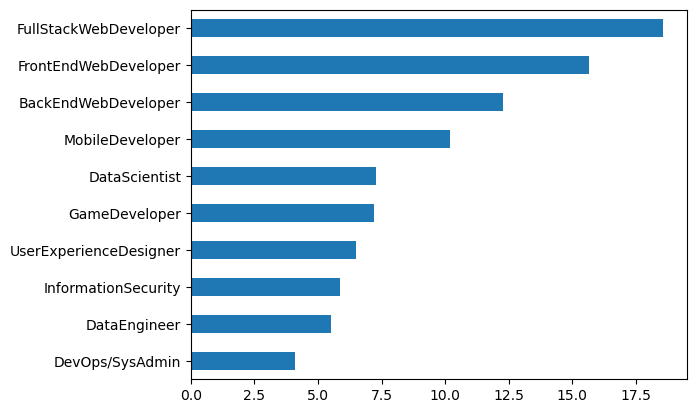

In [28]:
# Graficar la columna de la serie

import matplotlib.pyplot as plt
%matplotlib inline

ax = grafica.plot(kind='barh')

ax.invert_yaxis()
plt.show()

In [29]:
new_coder_survey['JobRoleInterest'].value_counts(normalize = True).head(10)[0:4]*100

FullStackWebDeveloper    18.575221
FrontEndWebDeveloper     15.637168
BackEndWebDeveloper      12.265487
MobileDeveloper          10.203540
Name: JobRoleInterest, dtype: float64

In [30]:
seleccion_web = new_coder_survey['JobRoleInterest'].value_counts(normalize = True).head(10)[0:3].sum() * 100
seleccion_mobile = new_coder_survey['JobRoleInterest'].value_counts(normalize = True).head(10)[3:4].sum() * 100
seleccion_total = seleccion_web + seleccion_mobile

print(f"seleccion_web:    {seleccion_web} \nseleccion_mobile: {seleccion_mobile} \ntotal:            {seleccion_total}")

seleccion_web:    46.477876106194685 
seleccion_mobile: 10.20353982300885 
total:            56.68141592920354


We can see that 56.68% percent of people are interested in web or mobile.


- Where are these new coders located.

In [31]:
# We select the indices of the output of value_counts that interest us

top_jobs = new_coder_survey['JobRoleInterest'].value_counts().head(10)[0:4]
top_jobs = top_jobs.index
top_jobs

Index(['FullStackWebDeveloper', 'FrontEndWebDeveloper', 'BackEndWebDeveloper',
       'MobileDeveloper'],
      dtype='object')

To make we are working with a representative sample, drop all the rows where participants didn't answer what role they are interested in.

In [32]:
pd.set_option("display.max_rows", None)

In [33]:
null_counts = new_coder_survey['JobRoleInterest'].isnull().sum()
null_counts

11183

Tenemos 11183 filas que tienen valores nulos de un total de 18175

In [34]:
null_counts_pct = null_counts / new_coder_survey['JobRoleInterest'].shape[0] * 100
null_counts_pct

33.10244797679306

The analysis focuses on the current location of `CountryLive` people and the importance of a greater number of potential customers in a market. To obtain a representative sample, it is advisable to eliminate the rows in which participants did not respond their interest in a specific role `JobRoleInterest`, since you can not know with certainty their interests.

In [35]:
# remove all Not a Number element in this Serie.
df_not_nan= new_coder_survey.dropna(subset=['JobRoleInterest'])

In [36]:
df_not_nan['JobRoleInterest'].isnull().sum()

0

In [37]:
df_not_nan.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,FullStackWebDeveloper,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,FrontEndWebDeveloper,no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,

In [38]:
# table of absolute frequencies
df_not_nan['CountryLive'].value_counts().head(10)

United States of America    10727
India                        1607
United Kingdom               1026
Canada                        884
Brazil                        406
Germany                       404
Poland                        361
Australia                     335
Russia                        267
Nigeria                       264
Name: CountryLive, dtype: int64

In [39]:
# table of relative frequencies
df_not_nan['CountryLive'].value_counts(normalize = True).head(10) * 100 

United States of America    48.494575
India                        7.264919
United Kingdom               4.638336
Canada                       3.996383
Brazil                       1.835443
Germany                      1.826401
Poland                       1.632007
Australia                    1.514467
Russia                       1.207052
Nigeria                      1.193490
Name: CountryLive, dtype: float64

Podemos continuar averiguando cuánto dinero están realmente dispuestos a gastar los nuevos codificadores en el aprendizaje. 

La publicidad dentro de los mercados donde la mayoría de las personas solo están dispuestas a aprender gratis es extremadamente improbable que sea rentable para nosotros. 

La columna `MoneyForLearning` describe en dólares estadounidenses la cantidad de dinero gastado por los participantes desde el momento en que comenzaron a codificar hasta el momento en que completaron la encuesta. 

Nuestra empresa vende suscripciones a un precio de $ 59 por mes, y por esta razón estamos interesados en saber:

- Cuánto dinero gasta cada estudiante por mes. 

- Parece una buena idea reducir nuestro análisis a solo cuatro países: Estados Unidos, India, Reino Unido y Canadá. 

Dos razones para esta decisión son: 

- Estos son los países que tienen las frecuencias absolutas más altas en nuestra muestra, lo que significa que tenemos una cantidad decente de datos para cada uno.

- Nuestros cursos están escritos en inglés, y el inglés es un idioma oficial en estos cuatro países. Cuanta más gente sepa inglés, mayores serán nuestras posibilidades de dirigirnos a las personas adecuadas con nuestros anuncios.



Cree una nueva columna que describa la cantidad de dinero que un estudiante ha gastado por mes (en el momento en que completó la encuesta). Deberá dividir la columna MoneyForLearning en la columna MonthsProgramming. Algunos estudiantes respondieron que habían estado aprendiendo a codificar durante 0 meses (podría ser que acababan de comenzar cuando completaron la encuesta). Para evitar dividir por 0, reemplace todos los valores de 0 con 1.

In [40]:
df_not_nan['MonthsProgramming'].isnull().sum()

1161

In [41]:
df_not_nan['MoneyForLearning'].isnull().sum()

1505

You'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column.
Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). 

To avoid dividing by 0, replace all the values of 0 with 1.

In [42]:
new_df = df_not_nan.copy()
new_df.loc[:,'money_spent_monthly'] = new_df['MoneyForLearning'].div(new_df['MonthsProgramming'], fill_value=1)

Find out how many null values there are in the new column (the column describing the amount of money students spend per month).

In [43]:
new_df['money_spent_monthly'].isnull().sum()

1165

In [44]:
# remove all Not a Number element in this Serie.
new_df.dropna(subset=['money_spent_monthly'], inplace = True)

In [45]:
df_not_nan['CountryLive'].isnull().sum()

480

In [46]:
new_df.dropna(subset=['CountryLive'], inplace = True)

In [47]:
grouped = new_df.groupby('CountryLive') # money_spent_monthly
happy_grouped = grouped['money_spent_monthly'].mean()
happy_grouped.sort_index(ascending=True)

CountryLive
Afghanistan                          0.000000
Albania                              8.466666
Algeria                              0.055556
Angola                             116.666664
Anguilla                             0.000000
Argentina                           67.744255
Aruba                                0.500000
Australia                                 NaN
Austria                            281.460083
Azerbaijan                          21.822222
Bahrain                              0.000000
Bangladesh                          80.193352
Belarus                             20.804171
Belgium                             37.807571
Bolivia                              0.083333
Bosnia & Herzegovina                18.613001
Botswana                             0.000000
Brazil                                    NaN
Bulgaria                                  NaN
Cambodia                            32.113094
Cameroon                             0.946970
Canada                

In [48]:
...

Ellipsis

In [49]:
new_df[['CountryLive','money_spent_monthly']].head(10)

,CountryLive,money_spent_monthly
1,United States of America,13.333333
2,United States of America,200.000000
3,United States of America,200.000000
4,United States of America,200.000000
5,United States of America,200.000000
6,United States of America,200.000000
7,Brazil,0.000000
8,Brazil,0.000000
9,Brazil,0.000000
10,Portugal,0.000000


Find out how many null values there are in the new column (the column describing the amount of money students spend per month).

Averigüe cuántos valores nulos hay en la nueva columna (la columna que describe la cantidad de dinero que los estudiantes gastan por mes). Mantenga solo las filas que no tengan un valor nulo para la nueva columna. 

Quite también las filas que tengan valores nulos en la columna `CountryLive`. 

Agrupe los datos restantes por la columna CountryLive y averigüe cuánto dinero gasta un estudiante en promedio cada mes en los Estados Unidos, India, el Reino Unido y Canadá.